# Final Proyect: Bank Marketing Segmentation

Group Members: 
- Paola Barrea
- Nicolás Bierti del Rey


The increasing number of marketing campaigns over time has reduced their effect on the general public.
In addition, economic pressures and competition have led companies to invest in targeted campaigns with strict selection of contacts. This type of campaign can be improved by using Business Intelligence (BI) and Data Mining (DM) techniques.<br><br>
The data was collected from a Portuguese marketing campaign related to the subscription of bank deposits. 
The business objective is **to find a model that can explain the success of a contact, that is, if the customer signs the deposit**.<br><br>
Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.<br><br>
The dataset was obtained in Kaggle: https://www.kaggle.com/dhirajnirne/bank-marketing

## Table of contents

- Data Acquisition
- Univariate Analalysis
- Bivariate Analysis
- Multivariate Analysis
- Columns Variants in Dataset
- Random Forest
- XGBoost
- Benchmarking
- Model Application
- Conclusions


## Data Acquisition

### Importing libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import phik
#from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
import sklearn.metrics as skm
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import OneSidedSelection
import plotly.io as pio
pio.renderers.default = "svg"
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing csv files

#### Dicctionary: bank_marketing_data.csv

<span style='color:orange'>**Personal information**<br></span>
**age**<br>
**age group**<br>
**eligible:** variable base in personal information<br>
**job:** type of job <br>
**salary**<br>
**marital**<br>
**education:** level of education completed <br>
**marital-education:** combination of previous columns<br>
**targeted:** variable base in personal information. Rename: **tag**<br>
<span style='color:orange'>**Financial information**<br></span>
**default:** has unpayed credit? <br>
**balance:** remaining balance in the account <br>
**housing:** has housing loan? <br>
**loan:** has previous loan?<br>
<span style='color:orange'>**Last contact information**<br></span>
**contact:** communication type <br>
**day:** day of the month <br>
**month** <br>
**duration:** in seconds, if equal to 0 target will be 'False' <br>
**campaign:** number of contacts preformed in this campaign for this client <br>
<span style='color:orange'>**Previous campaing info**<br></span>
**pdays:** number of days pass since last contact in previous campaing, 999 equals 'no contact'. Rename: **pcampign**<br>
**previous:**  number of contacts preformed in previous campaing for this client <br>
**poutcome:** outcome of the previous marketing campaign<br>
<span style='color:orange'>**Target**<br></span>
**y:** has the client subscribed?, equal to 'response'<br>
**response** rename **outcome**

In [56]:
bank_df = pd.read_csv("bank_marketing_data.csv")
bank_df.head()

age  age group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  married   tertiary   
1   44          4        Y    technician   60000   single  secondary   
2   33          3        Y  entrepreneur  120000  married  secondary   
3   47          4        Y   blue-collar   20000  married    unknown   
4   33          3        Y       unknown       0   single    unknown   

   marital-education targeted default  ...  contact day month duration  \
0   married-tertiary      yes      no  ...  unknown   5   may      261   
1   single-secondary      yes      no  ...  unknown   5   may      151   
2  married-secondary      yes      no  ...  unknown   5   may       76   
3    married-unknown       no      no  ...  unknown   5   may       92   
4     single-unknown       no      no  ...  unknown   5   may      198   

   campaign pdays  previous  poutcome   y  response  
0         1    -1         0   unknown  no         0  
1         1    -1         0   unknown  no         0  
2         1    -1         0   unknown  no         0  
3         1    -1         0   unknown  no         0  
4         1    -1         0   unknown  no         0  

[5 rows x 23 columns]

In [57]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

Observations:
- The variables are numeric integer & categorical.
- There's columns with binary values.
- None null values

### Renaming columns

In [58]:
bank_df.rename(columns={'age group':'age_group','targeted':'tag','previous':'pcampaign','response':'outcome'},inplace=True)
bank_df.head()

age  age_group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  married   tertiary   
1   44          4        Y    technician   60000   single  secondary   
2   33          3        Y  entrepreneur  120000  married  secondary   
3   47          4        Y   blue-collar   20000  married    unknown   
4   33          3        Y       unknown       0   single    unknown   

   marital-education  tag default  ...  contact day month duration  campaign  \
0   married-tertiary  yes      no  ...  unknown   5   may      261         1   
1   single-secondary  yes      no  ...  unknown   5   may      151         1   
2  married-secondary  yes      no  ...  unknown   5   may       76         1   
3    married-unknown   no      no  ...  unknown   5   may       92         1   
4     single-unknown   no      no  ...  unknown   5   may      198         1   

  pdays  pcampaign  poutcome   y  outcome  
0    -1          0   unknown  no        0  
1    -1          0   unknown  no        0  
2    -1          0   unknown  no        0  
3    -1          0   unknown  no        0  
4    -1          0   unknown  no        0  

[5 rows x 23 columns]

### Droping duplicates

In [59]:
bank_df.drop_duplicates(inplace = True)
bank_df.shape

(45211, 23)

## Univariate Analysis

In the following cells, there is an analysis of the columns belived to have a more relevant impact in the outcome according to the nature of the data provided in the column. The nature of the data reffers to the dtype, unique values and the intrinsic meaning giving by the definition.

### Binary variables analysis

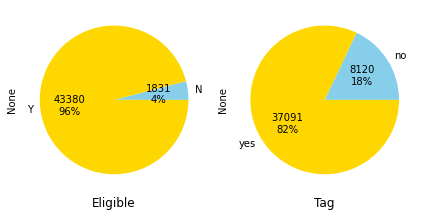

In [60]:
#Variables eligible & tag

def label_function(val):
    return f'{val / 100 * len(bank_df):.0f}\n{val:.0f}%'#Calculates percentage from total appearance

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))

bank_df.groupby('eligible').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['skyblue', 'gold'], ax=ax1)
bank_df.groupby('tag').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['skyblue', 'gold'], ax=ax2)
                                
ax1.set_xlabel('Eligible', size=12)
ax2.set_xlabel('Tag', size=12)

plt.tight_layout()
plt.show()

Observations:
- Unbalance variables.

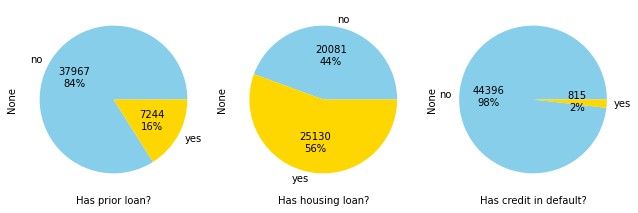

In [61]:
#Variables loan, housing & default

def label_function(val):
    return f'{val / 100 * len(bank_df):.0f}\n{val:.0f}%'

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(9, 4))

bank_df.groupby('loan').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['skyblue', 'gold'], ax=ax1)
bank_df.groupby('housing').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['skyblue', 'gold'], ax=ax2)
bank_df.groupby('default').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['skyblue', 'gold'], ax=ax3)                                
ax1.set_xlabel('Has prior loan?', size=10)
ax2.set_xlabel('Has housing loan?', size=10)
ax3.set_xlabel('Has credit in default?', size=10)
plt.tight_layout()
plt.show()

Observations:
- The amount of clients with housing loan is divided almost by half.
- Most clients didn't acquired previous loans and even less are in default with their credits.


### Personal information variables

Age

In [62]:
bank_df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

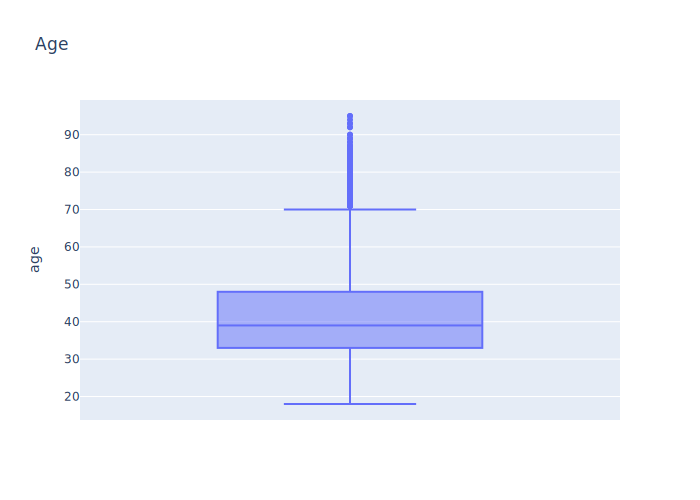

In [63]:
#Age distribution
px.box(bank_df, y= 'age', title = 'Age',).show()


Job

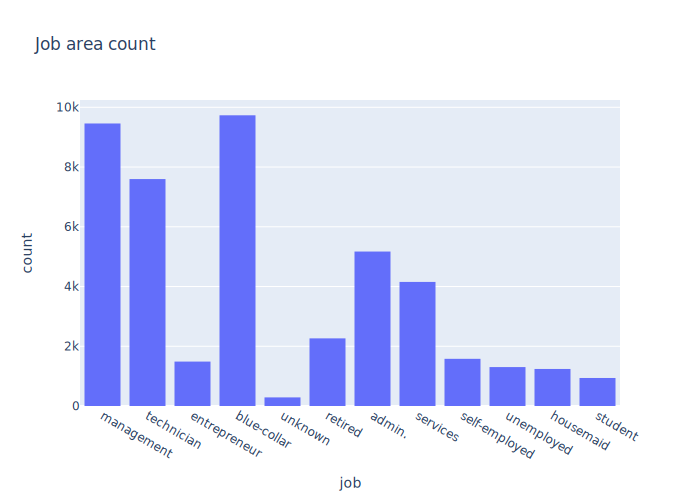

In [64]:
#Unique values count for Job variable
px.histogram(bank_df, x= bank_df['job'], labels={'x':'Job area'}, title = 'Job area count').show()

Salary

In [65]:
bank_df['salary'].describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

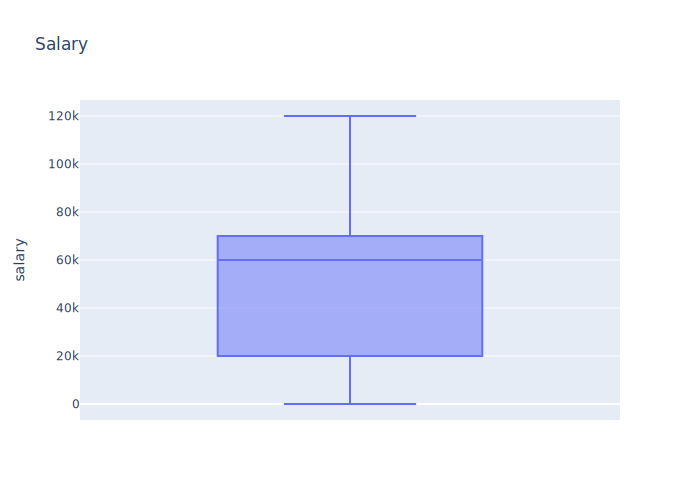

In [66]:
#Salary distribution
px.box(bank_df, y= 'salary', title = 'Salary').show()

Education

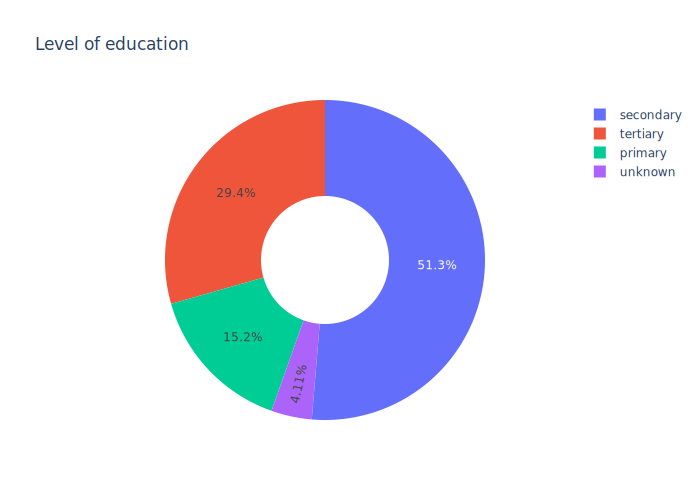

In [67]:
#Visualizing percentage of the existing levels of education
education_count = bank_df['education'].value_counts().reset_index()
education_count.rename(columns={'index':'education','education':'num_clients'}, inplace=True)
px.pie(education_count, values='num_clients' , names='education', title = 'Level of education',hole=.4).show()

Balance

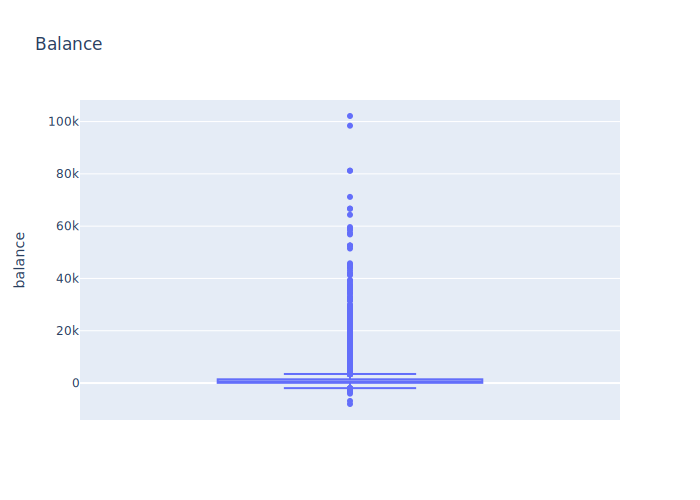

In [68]:
# Account balance distribution, money remainig in their account
px.box(bank_df, y= 'balance', title = 'Balance').show()

In [69]:
# Percentage of the entries that fall into outliers in the variable balance
balance_out = bank_df.loc[(bank_df['balance'] >= -2000) & (bank_df['balance'] <= 3500)].shape
perctg_outlier = (bank_df.shape[0] - balance_out[0])/bank_df.shape[0]*100
perctg_outlier


10.313861670832319

Observation:<br>
- Most of the clients fall into the **age range between 30 and 50**. There is outliers over 70.<br>
- 5 of the 12 job areas encompasses most of the clients.<br>
- There's **no outliers** in **salary**. This variable has a fairly even distribution.
- Most of the clients have reached a secondary or tertiary level of education.

### Contact variables

Contact type

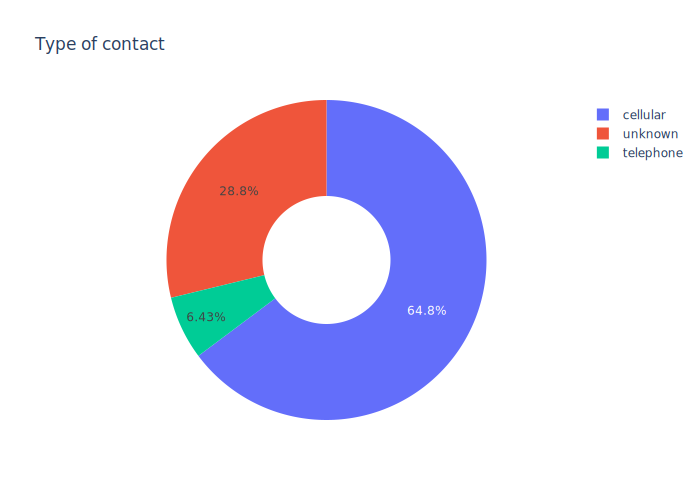

In [70]:
#Percentage of appearence from unique values
contact_count = bank_df['contact'].value_counts().reset_index()
px.pie(contact_count, values='contact' , names='index', title = 'Type of contact',hole=.4).show()

Month

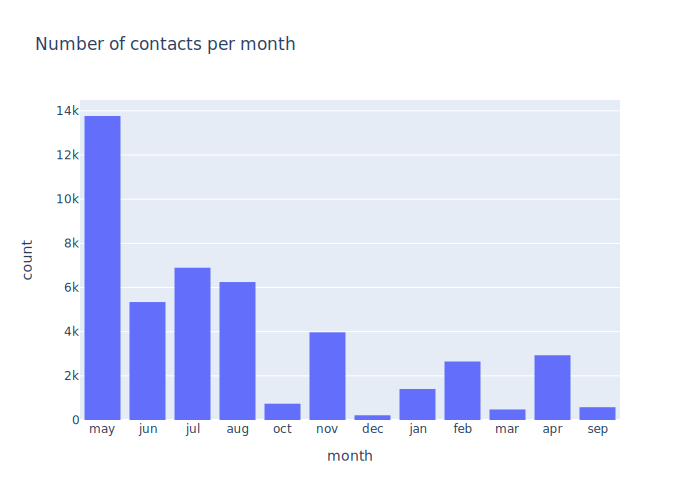

In [71]:
#Number of contacts made in each month
px.histogram(bank_df, x= bank_df['month'], labels={'x':'Month'}, title = 'Number of contacts per month').show()

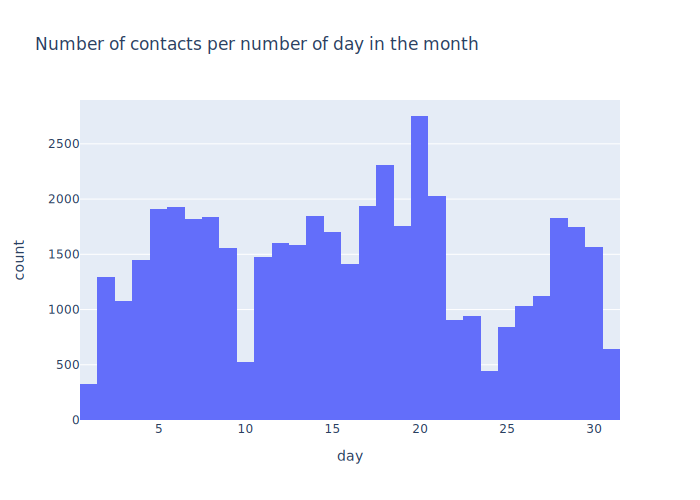

In [72]:
px.histogram(bank_df, x= bank_df['day'], labels={'x':'Day'}, title = 'Number of contacts per number of day in the month').show()

Duration

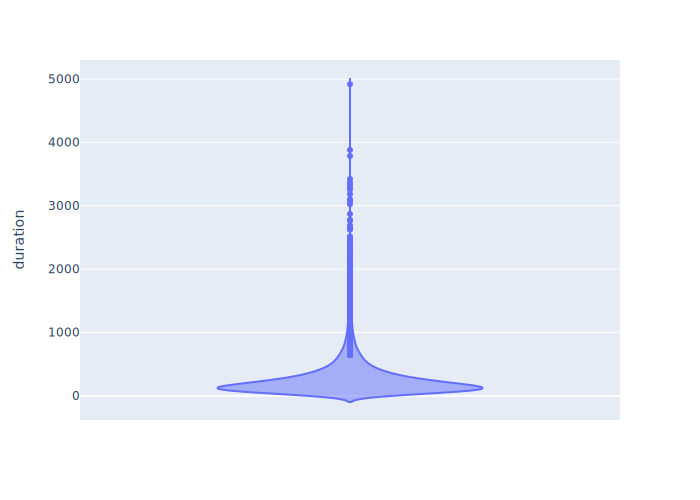

In [73]:
#Distribution of the duration of the call
px.violin(bank_df, y='duration')

In [74]:
bank_df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Number of contacts in campaign

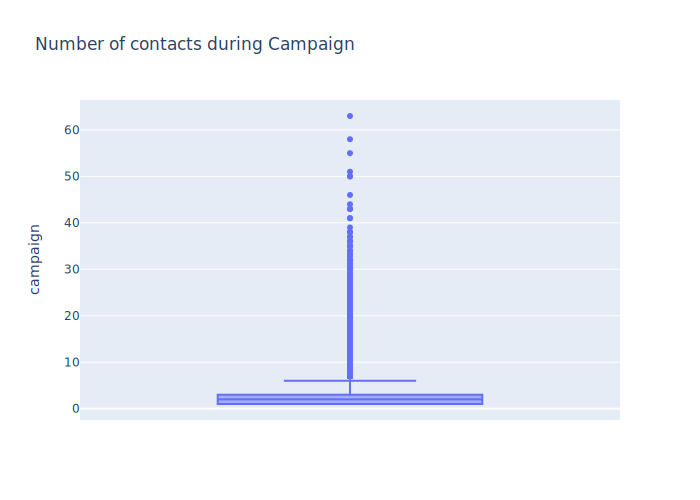

In [75]:
px.box(bank_df, y='campaign',title='Number of contacts during Campaign')

Observations:<br>
- Most contacts were made by cellphone, there's missing information reflected as 'unknown'.<br>
- Most contacts were made between may and august.<br>
- There's difference int he number of contacts according to the day, but there is no visible relation.<br>
- There is many **outliers** in the variables **duration & campaign**. Most are conentrated under 1500 seconds in duration and under 6 contacts in campaign.

### Target analysis

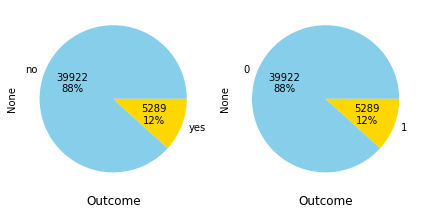

In [76]:
def label_function(val):
    return f'{val / 100 * len(bank_df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))

bank_df.groupby('y').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['skyblue', 'gold'], ax=ax1)
bank_df.groupby('outcome').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['skyblue', 'gold'], ax=ax2)
                                
ax1.set_xlabel('Outcome', size=12)
ax2.set_xlabel('Outcome', size=12)

plt.tight_layout()
plt.show()

Observations:<br>
- It's highly likely that both variables are the same, this can be confirm with correlation.

## Bivariate Analysis

### Correlations

Text(0.5, 1.0, 'Variables correlation')

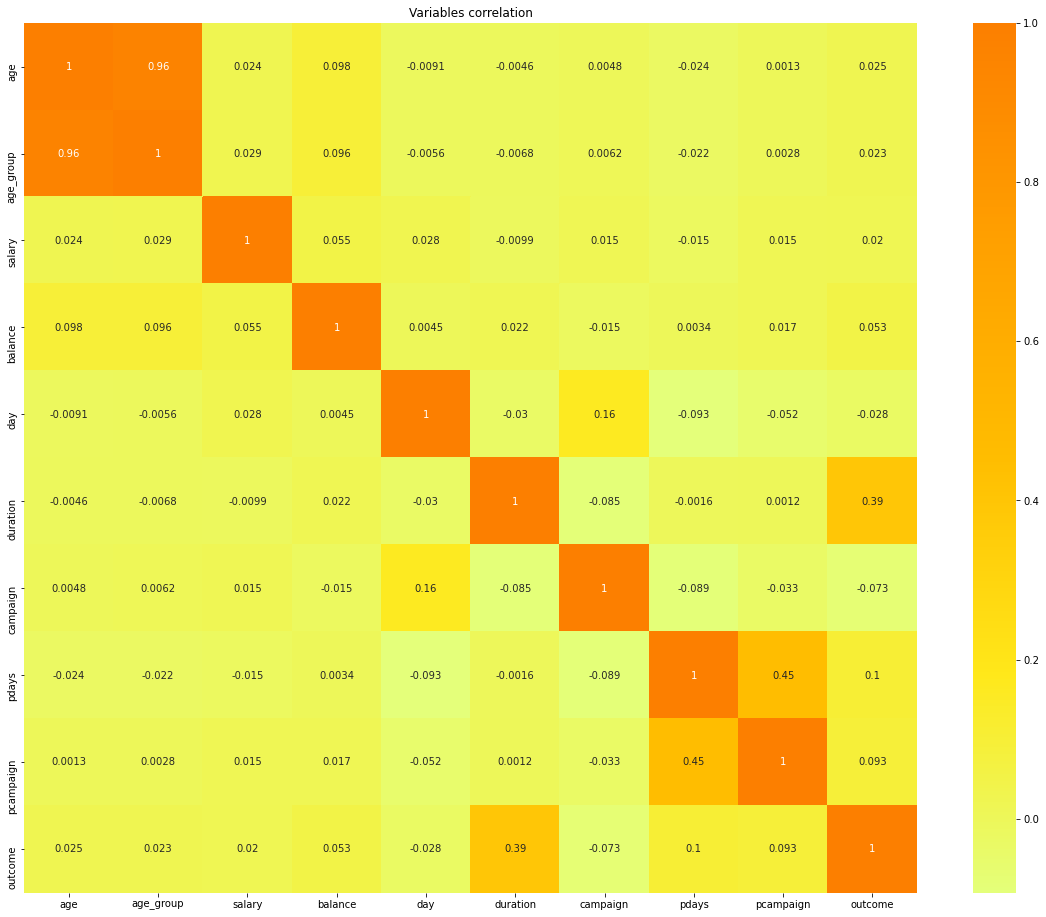

In [77]:
plt.rcParams['figure.figsize'] = (20, 16)
#Correlation for numeric variables 
sns.heatmap(bank_df.corr(), annot = True, cmap = 'Wistia')
plt.title('Variables correlation')

Observations:<br>
- High linear correlation between **duration & outcome**, target variable.<br>
- Some linear correlation between **days since last marketing campaign contact (pdays) & response**.<br>
- High linear correlation between **pdays & amount of times contacted the client in previous campaign (pcampaign)**.<br>
- Some linear correlation between **day of contact (day) & number of contacts to the client (campaign) **.<br>


interval columns not set, guessing: ['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'pcampaign', 'outcome']


Text(0.5, 1.0, 'Variables correlation with phik')

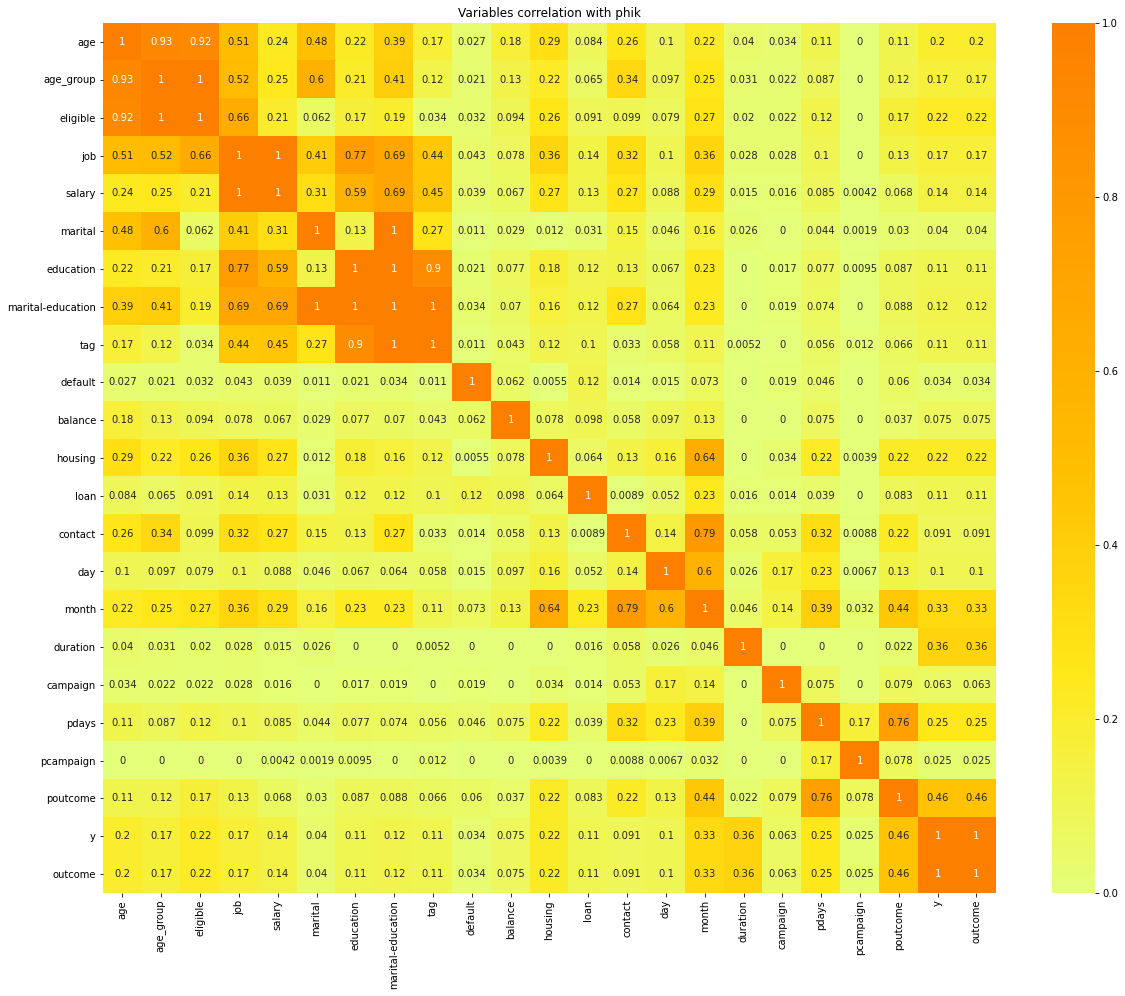

In [78]:
plt.rcParams['figure.figsize'] = (20, 16)
#It is use 'phik' correlation to be able to obtain correlation between categorical variables 
sns.heatmap(bank_df.phik_matrix(), annot = True, cmap = 'Wistia')
plt.title('Variables correlation with phik')

Observation:<br>
- The variables 'y' & 'outcome' have a correlation of **1** and the same correlation with other variables, confirming that they're the same varible, different expression.<br>
- The variable **outcome** is correlatead with the following variables, order from highest to lower:
    - **poutcome:** outcome in previous campaign.
    - **duration:** call duration in seconds.
    - **month**
    - **pdays**
    - **housing loan & eligible**
    - **age**
    - **job**
- The following variables have a high correlation between each other:
    - age, age group & eligible
    - job with the previous variables
    - **job & salary** with a correlation of **1**
    - **job, education & marital_education**
    - **education, marital_education & tag** **1 & 0.9**
    - **month & day**

### Duration vs Outcome

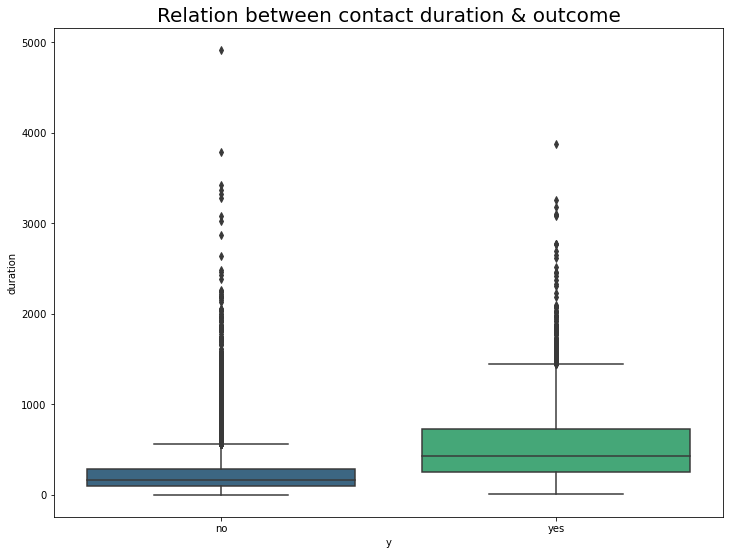

In [79]:
plt.rcParams['figure.figsize'] = (12, 9)

sns.boxplot(bank_df['y'], bank_df['duration'], palette = 'viridis')
plt.title('Relation between contact duration & outcome', fontsize = 20)
plt.show()

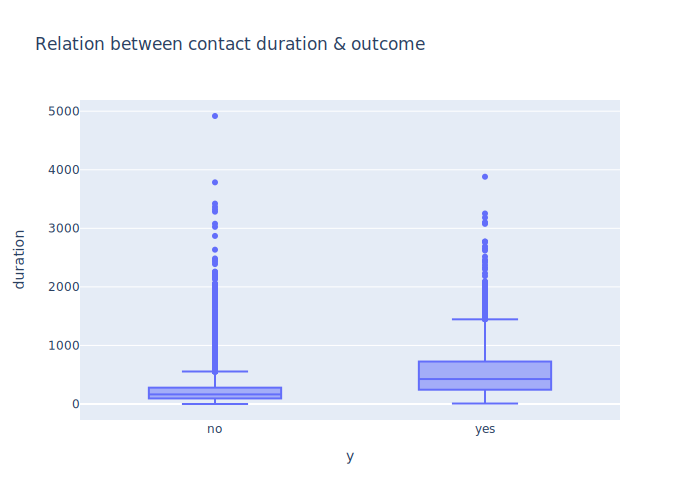

In [80]:
fig = px.box(bank_df, x="y", y="duration",title='Relation between contact duration & outcome')
fig.show()

Observations:<br>
- When **outcome** is **yes**, **duration** has a **higher median**.<br>
- Duration over 279 are more likely to be a **yes** response. 

### poutcome vs pdays

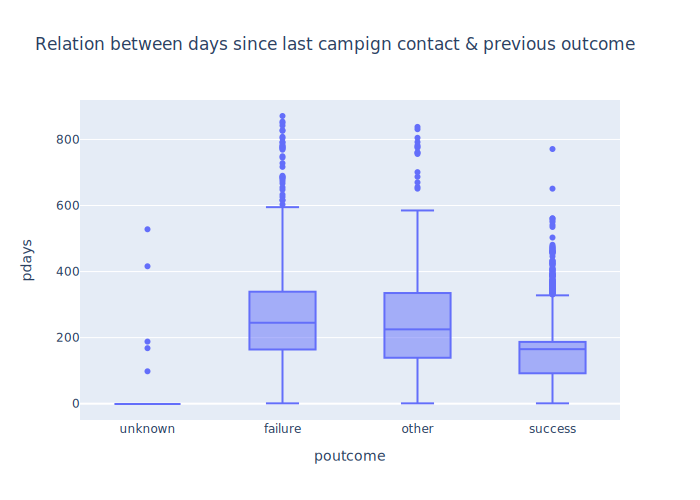

In [81]:
fig = px.box(bank_df, x="poutcome", y="pdays",title='Relation between days since last campign contact & previous outcome')
fig.show()

Observations:<br>
- If the number of days (pdays) is under 200, the previous outcome (poutcome) was likely successful. And, since this has a positive correlation with the current outcome, this is likely to be **yes**.

### Marital-education & tag

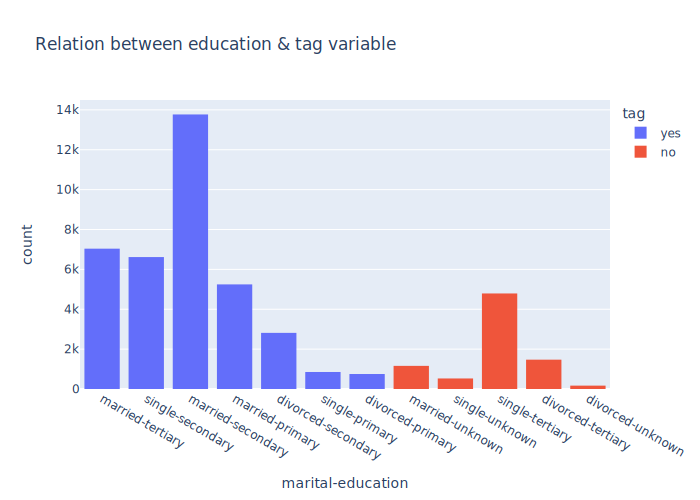

In [82]:
fig = px.histogram(bank_df, x="marital-education", color="tag", title="Relation between education & tag variable")
fig.show()

In [83]:
bank_df.groupby(['tag','y']).size().reset_index()

tag    y      0
0   no   no   6785
1   no  yes   1335
2  yes   no  33137
3  yes  yes   3954

Observations:<br>
- The variable **tag** is defined base on the variable **marital-education** which in turn is a combination of those variables.<br>
- The variable **tag** does not have a visible correlation with **outcome**.

### Age group & eligible

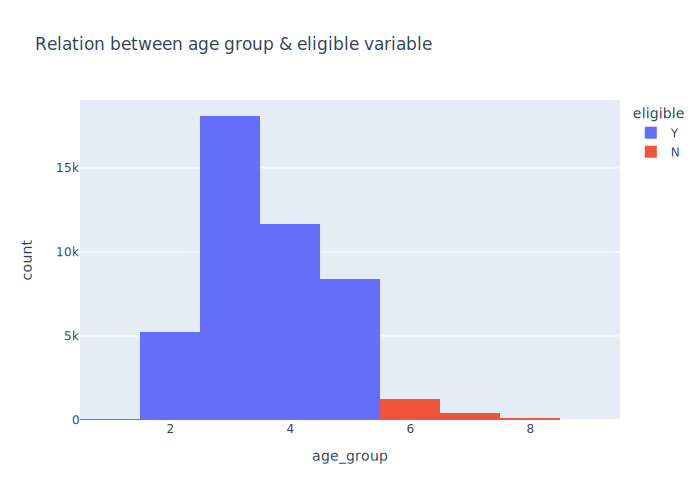

In [84]:
fig = px.histogram(bank_df, x="age_group", color="eligible", title="Relation between age group & eligible variable")
fig.show()

Observations:<br>
- The variable **eligible** is defined base on the variable **age_group** which in turn is base on age.<br>

### Salary & job

In [85]:
bank_df.groupby(['job','salary']).size().reset_index()

job  salary     0
0          admin.   50000  5171
1     blue-collar   20000  9732
2    entrepreneur  120000  1487
3       housemaid   16000  1240
4      management  100000  9458
5         retired   55000  2264
6   self-employed   60000  1579
7        services   70000  4154
8         student    4000   938
9      technician   60000  7597
10     unemployed    8000  1303
11        unknown       0   288

### Month & outcome

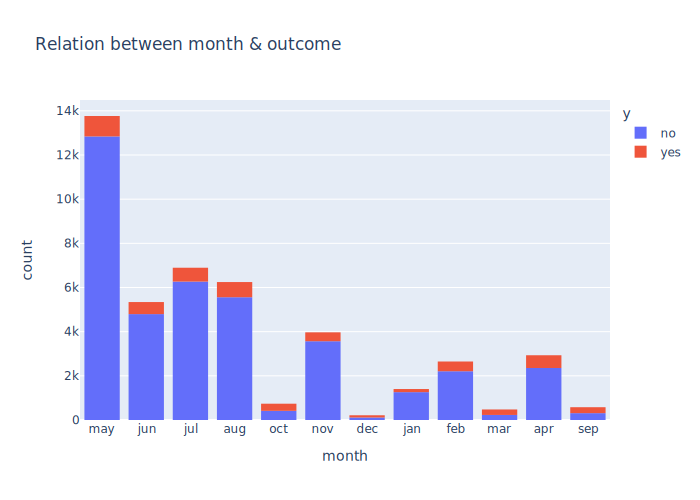

In [86]:
fig = px.histogram(bank_df, x="month", color="y", title="Relation between month & outcome")
fig.show()

In [87]:
# Cross tabulation
month_tab = pd.crosstab(index=bank_df['month'],columns=bank_df['y']).reset_index()
perctg = [i for i in month_tab['yes']/(month_tab['yes']+month_tab['no'])*100] #Percentage of 'yes' in each month
month_tab['%'] = perctg
month_tab.sort_values(by = '%')


y  month     no  yes          %
8    may  12841  925   6.719454
5    jul   6268  627   9.093546
4    jan   1261  142  10.121169
9    nov   3567  403  10.151134
6    jun   4795  546  10.222805
1    aug   5559  688  11.013286
3    feb   2208  441  16.647792
0    apr   2355  577  19.679400
10   oct    415  323  43.766938
11   sep    310  269  46.459413
2    dec    114  100  46.728972
7    mar    229  248  51.991614

Observations:<br>
The outcome percentage varies according to the contact month, but the amount of contacts per month also varies.

### Job & outcome

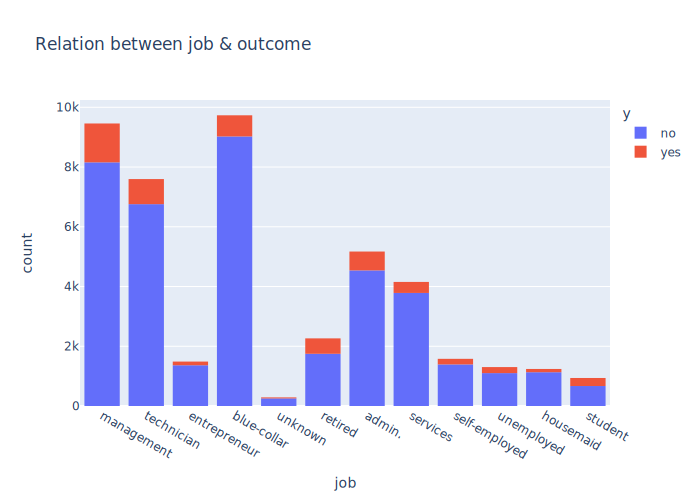

In [88]:
fig = px.histogram(bank_df, x="job", color="y", title="Relation between job & outcome")
fig.show()

Observations:<br>
The outcome varies slightly according to the ocupation of the client.

### Week of the month & outcome

In [89]:
# Grouping the variable day in weeks
conditions = [
    (bank_df['day'] >= 1) & (bank_df['day'] <= 7),
    (bank_df['day'] >= 8) & (bank_df['day'] <= 14),
    (bank_df['day'] >= 15) & (bank_df['day'] <= 21),
    (bank_df['day'] >= 22) & (bank_df['day'] <= 31)
]
choices = ['1','2','3','4']
bank_df['week'] = np.select(conditions, choices)

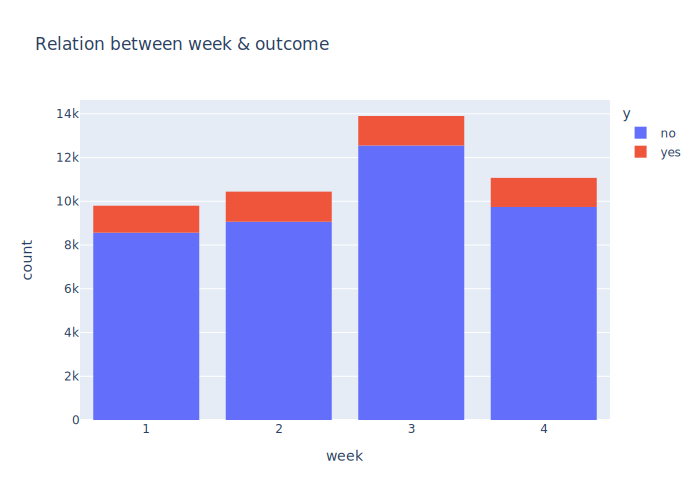

In [90]:
fig = px.histogram(bank_df, x="week", color="y", title="Relation between week & outcome")
fig.show()

In [91]:
bank_df.drop(['week'], axis =1, inplace=True)

Observation:<br>
There's no visible relation between the week of the month of contact (beggining or ending of the week) and the outcome.


## Multivariate Analysis

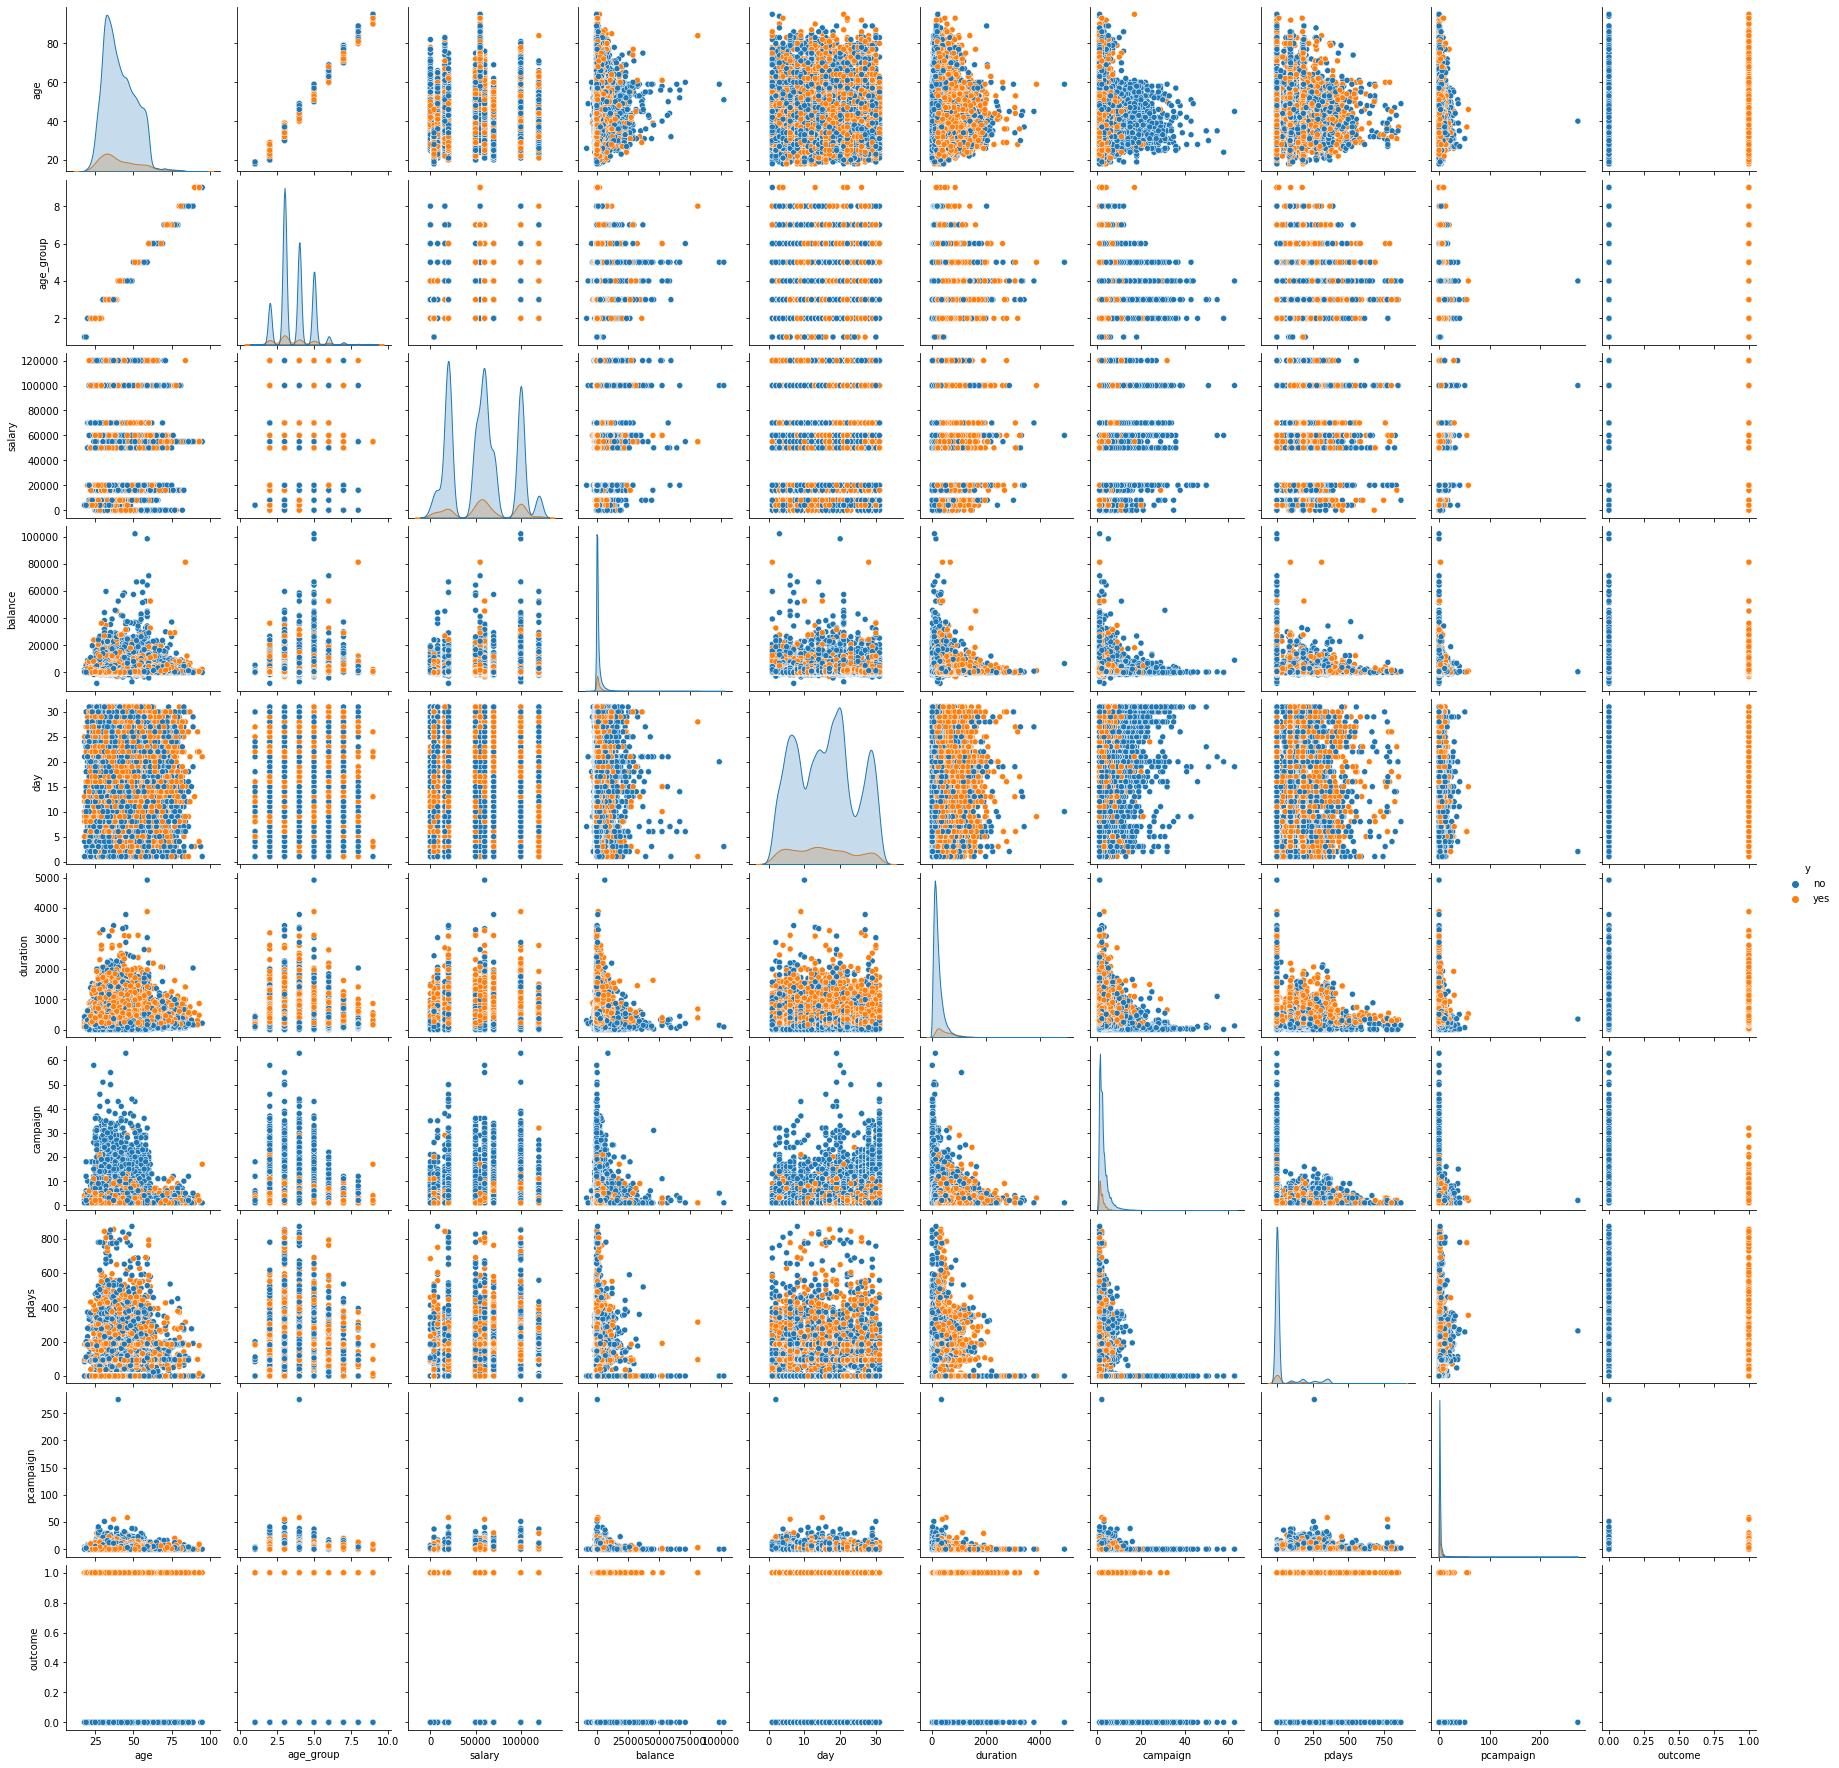

In [92]:
sns.pairplot(bank_df, hue='y')

General analysis, there's no visible relation between the variables.

### Duration, age, poutcome & housing

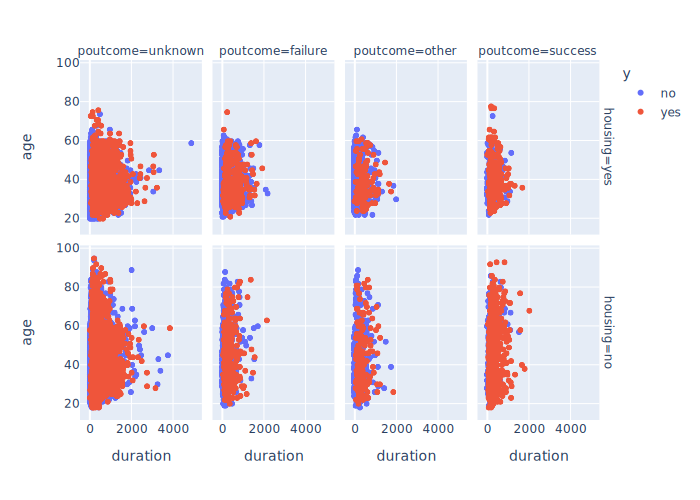

In [93]:
fig = px.scatter(bank_df, x="duration", y="age", color="y", facet_col="poutcome",facet_row='housing')
fig.show()

The purpose of this plot is to discern, in a visual manner, if the most correlated variables can divide the outcome in groups.<br>
It looks like most 'yes' outcomes are concentrated in 'poutcome' unknown and success; 'housing' has no discernible impact.

### Balance, age, poutcome & loan

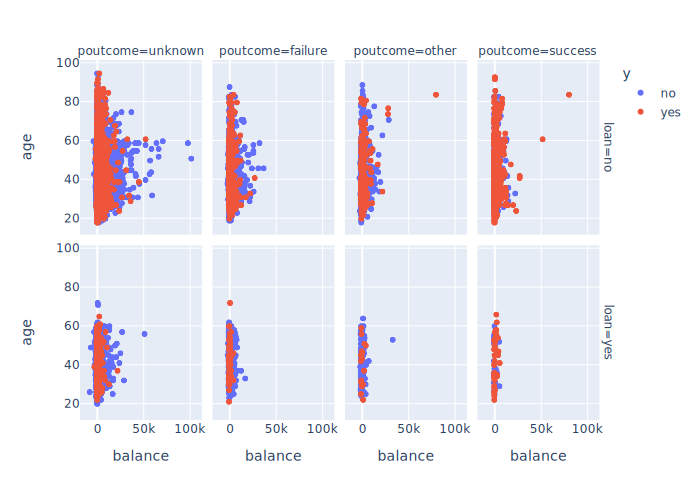

In [94]:
fig = px.scatter(bank_df, x="balance", y="age", color="y", facet_col="poutcome",facet_row='loan')
fig.show()

The purpose of this plot is to discern, in a visual manner, if the use variables can divide the outcome in groups.<br>
It looks like most 'yes' outcomes are concentrated in 'poutcome' unknown and success; 'loan' seems to concentrate more 'yes' outcome in the 'no' answer.<br>
The variable 'balance', with low correlation in the matrix, does seem to have some impact in the outcome.

# Columns Variants in Dataset

### Defining alternatives: dropping columns

The following considerations are taken into account when dropping columns:<br>
- This columns are highly correlated with each other, so only one of them must remain:<br>
    - age, age_group, eligible<br>
    - job, salary<br>
    - marital, education, marital-education, tag<br>
    - pdays, pcampaign, poutcome<br>
- The variable 'day' it has a high cardinality and low correlation with target.
- The columns 'duration' and 'campaign' is information that we're not going to have in future predictive models,
since it's the information of the contact we haven't made yet. This column can be use for benchmarking.

In [41]:
# Benchmark dataframe
bank_bm = bank_df.copy()

In [42]:
#Dropping the columns that we shouldn't use in the prediction
bank_df.drop(['duration','campaign'], axis =1, inplace=True)
#Option 1
df1 = bank_df.drop(['age','eligible', 'salary', 'education', 'marital', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)
#Option 2: Uses age instead of age_group
df2 = bank_df.drop(['age_group','eligible', 'salary', 'education', 'marital', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)
#Option 3: Uses marital & education instead of marital-education
df3 = bank_df.drop(['age','eligible', 'salary', 'marital-education', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)
#Option 4: Uses only marital instead of marital-education
df4 = bank_df.drop(['age','eligible', 'salary', 'marital-education', 'education', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)
#Option 5: Uses salary instead of job
df5 = bank_df.drop(['age','eligible', 'job', 'education', 'marital', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)
#Option 6: Without contact
df6 = bank_df.drop(['age','eligible', 'salary', 'contact','education', 'marital', 'tag', 'day', 'pdays','pcampaign', 'y'], axis =1)

In [43]:
# def random_forest(X_train, y_train, X_test, y_test):
def random_forest(dataframe,attempt_name):
    
    dataframe_dummy = pd.get_dummies(dataframe, drop_first=True)
    #Spliting entry from target
    X = dataframe_dummy.drop('outcome', axis=1) #Target is drop from the data
    y = dataframe_dummy.outcome #Target
    #30% for test & 70% for train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y) 
    rnd_forest = RandomForestClassifier(max_depth=4,
                                        random_state=1, 
                                        n_estimators=200,
                                        class_weight="balanced_subsample", 
                                        max_features="log2", 
                                        bootstrap=True)
    #Preprocessing
    overs = SMOTE(sampling_strategy= 0.2, random_state= 1)
    os_Xtrain,os_ytrain = overs.fit_resample(X_train,y_train)
    #Model Training
    rnd_forest.fit(os_Xtrain,os_ytrain)
    # predict probabilities
    rf_probs = rnd_forest.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    # predict class values
    y_train_prf = rnd_forest.predict(X_train) #Test prediction
    y_test_prf = rnd_forest.predict(X_test) #Test prediction
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    results={"name": attempt_name,
            "train_recall": train_recall, 
             "test_recall":test_recall, 
             "precision": test_precision,
             "roc_auc": roc_auc,
              "pr_auc": rf_auc,
              "FN": fn,
              "FP": fp}

    #Variables importance
    plt.figure(figsize=(6,6))
    importances = rnd_forest.feature_importances_
    columns = X.columns
    sns.barplot(columns, importances)
    plt.title('Feature importance')
    plt.xticks(rotation = 90)
    plt.show()
    
    return results

### Results Table Creation 

In [44]:
# An empty df is created to store the metrics of each alternative
column_names = ["name","train_recall", "test_recall", "precision","roc_auc","pr_auc", "FN","FP"]
rf_result_df = pd.DataFrame(columns = column_names)

### RF 1 df1

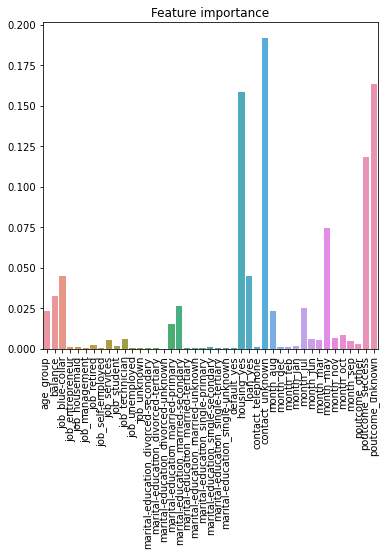

In [45]:
results_1 = random_forest(df1, 'df1');
rf_result_df = rf_result_df.append(results_1, ignore_index = True)

### RF 1 df2

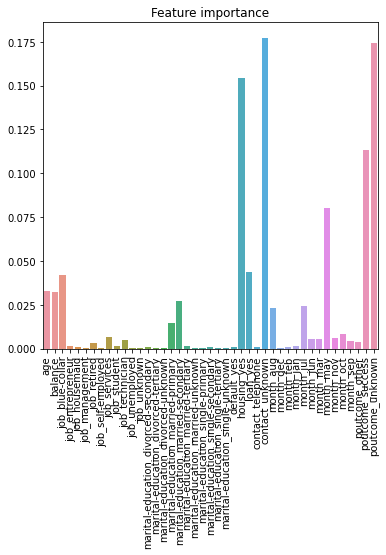

In [46]:
results_2 = random_forest(df2, 'df2');
rf_result_df = rf_result_df.append(results_2, ignore_index = True)

### RF 1 df3

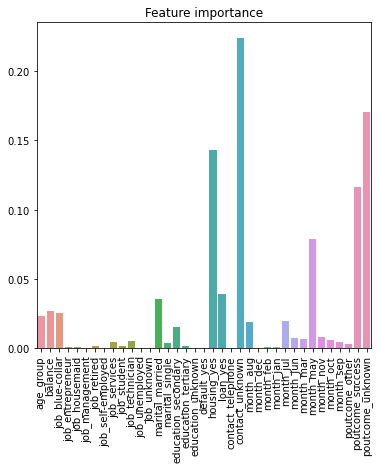

In [47]:
results_3 = random_forest(df3, 'df3');
rf_result_df = rf_result_df.append(results_3, ignore_index = True)

### RF 1 df4

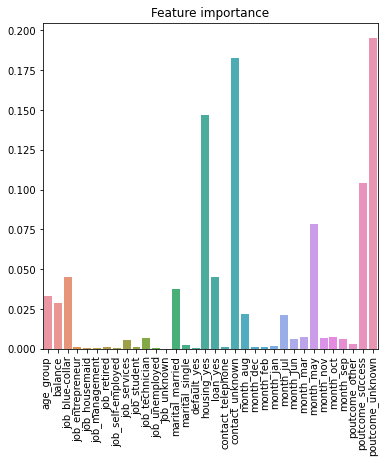

In [48]:
results_4 = random_forest(df4, 'df4');
rf_result_df = rf_result_df.append(results_4, ignore_index = True)

### RF 1 df5

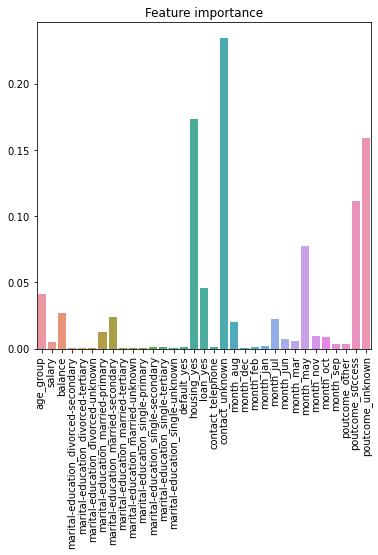

In [49]:
results_5 = random_forest(df5, 'df5');
rf_result_df = rf_result_df.append(results_5, ignore_index = True)

### RF 1 df6

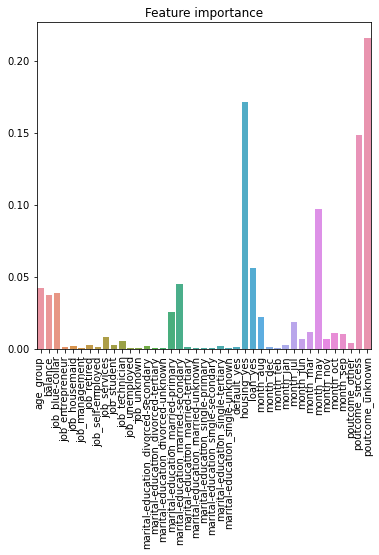

In [50]:
results_6 = random_forest(df6, 'df6');
rf_result_df = rf_result_df.append(results_6, ignore_index = True)

### Visualize Results Table

In [51]:
rf_result_df

name  train_recall  test_recall  precision   roc_auc    pr_auc   FN    FP
0  df1      0.647488     0.654064   0.244581  0.693192  0.370697  549  3206
1  df2      0.641275     0.644612   0.248482  0.693142  0.370736  564  3094
2  df3      0.652620     0.657845   0.242960  0.693121  0.371639  543  3253
3  df4      0.620205     0.620038   0.261493  0.694005  0.368729  603  2779
4  df5      0.659643     0.661626   0.234689  0.687872  0.372399  537  3424
5  df6      0.594003     0.583491   0.256652  0.679781  0.360738  661  2682

In [52]:
# Dataframe 'df5' will be used to train the model, it's rename to 'df0'
df0 = df5

In [53]:
df0_dummy = pd.get_dummies(df0, drop_first=True)
df0_dummy.head()

age_group  salary  balance  outcome  marital-education_divorced-secondary  \
0          5  100000     2143        0                                     0   
1          4   60000       29        0                                     0   
2          3  120000        2        0                                     0   
3          4   20000     1506        0                                     0   
4          3       0        1        0                                     0   

   marital-education_divorced-tertiary  marital-education_divorced-unknown  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

   marital-education_married-primary  marital-education_married-secondary  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    1   
3                                  0                                    0   
4                                  0                                    0   

   marital-education_married-tertiary  ...  month_jul  month_jun  month_mar  \
0                                   1  ...          0          0          0   
1                                   0  ...          0          0          0   
2                                   0  ...          0          0          0   
3                                   0  ...          0          0          0   
4                                   0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          1          0          0          0               0   
1          1          0          0          0               0   
2          1          0          0          0               0   
3          1          0          0          0               0   
4          1          0          0          0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 34 columns]

## Preprocessing alternatives

Oversampling & undersamplig techniques for imbalanced datsets.

### SMOTE

In [54]:
#Spliting entry from target
X = df0_dummy.drop('outcome', axis=1) #Target is drop from the data
y = df0_dummy.outcome #Target

#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify= y) 

In [55]:
rnd_forest = RandomForestClassifier(max_depth=4,
                                    random_state=1, 
                                    n_estimators=200,
                                    class_weight="balanced_subsample", 
                                    max_features="log2", 
                                    bootstrap=True)

In [56]:
# An empty df is created to store the metrics of each alternative
column_names = ["Sampling", "recall", "precision","roc_auc", "FN","FP"]
pfm_smote = pd.DataFrame(columns = column_names)

In [57]:
for i in range(2,9):
    #Fitting the model
    overs = SMOTE(sampling_strategy= i*0.1, random_state= 0)
    os_Xtrain,os_ytrain = overs.fit_resample(X_train,y_train)
    rnd_forest.fit(os_Xtrain,os_ytrain)
    y_train_prf = rnd_forest.predict(X_train) #Train prediction
    y_test_prf = rnd_forest.predict(X_test) #Test prediction
    # predict probabilities
    rf_probs = rnd_forest.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]
    option = {"Sampling": i*0.1, "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "pr_auc": rf_auc,"FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

Sampling    recall  precision   roc_auc     FN      FP    pr_auc
0       0.2  0.646503   0.222898  0.673924  561.0  3577.0  0.357170
1       0.3  0.611216   0.243108  0.679533  617.0  3020.0  0.348806
2       0.4  0.590422   0.253106  0.679782  650.0  2765.0  0.340604
3       0.5  0.565217   0.269369  0.681039  690.0  2433.0  0.336515
4       0.6  0.533081   0.286585  0.678622  741.0  2106.0  0.328342
5       0.7  0.528040   0.287874  0.677479  749.0  2073.0  0.323609
6       0.8  0.522999   0.290922  0.677046  757.0  2023.0  0.321941

Recall underpreformed with oversampling.

### SMOTE & Random Undersampling

In [58]:
#Spliting entry from target
X = df0_dummy.drop('outcome', axis=1) #Target is drop from the data
y = df0_dummy.outcome #Target

#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify= y) 

In [59]:
rnd_forest = RandomForestClassifier(max_depth=4,
                                        random_state=1, 
                                        n_estimators=200,
                                        class_weight="balanced_subsample", 
                                        max_features="log2", 
                                        bootstrap=True)

In [60]:
# An empty df is created to store the metrics of each alternative
column_names = ["Sampling", "recall", "precision","roc_auc", "FN","FP"]
pfm_smote = pd.DataFrame(columns = column_names)

In [61]:
for i in range(4,9):
    #Fitting the model
    overs = SMOTE(sampling_strategy= 0.2, random_state= 0)
    os_Xtrain,os_ytrain = overs.fit_resample(X_train,y_train)
    under = RandomUnderSampler(sampling_strategy=i*0.1)
    tr_Xtrain, tr_ytrain = under.fit_resample(os_Xtrain,os_ytrain)
    rnd_forest.fit(tr_Xtrain, tr_ytrain)
    y_train_prf = rnd_forest.predict(X_train) #Train prediction
    y_test_prf = rnd_forest.predict(X_test) #Test prediction
    # predict probabilities
    rf_probs = rnd_forest.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]
    option = {"Sampling": i*0.1, "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "pr_auc": rf_auc,"FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

Sampling    recall  precision   roc_auc     FN      FP    pr_auc
0       0.4  0.645873   0.220099  0.671312  562.0  3632.0  0.359812
1       0.5  0.645243   0.220357  0.671373  563.0  3623.0  0.357079
2       0.6  0.654694   0.221441  0.674847  548.0  3653.0  0.360588
3       0.7  0.639572   0.226259  0.674883  572.0  3471.0  0.359462
4       0.8  0.638941   0.225484  0.674067  573.0  3483.0  0.356317

### SMOTE & Undersampling

In [62]:
#Spliting entry from target
X = df0_dummy.drop('outcome', axis=1) #Target is drop from the data
y = df0_dummy.outcome #Target

#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify= y) 

In [63]:
rnd_forest = RandomForestClassifier(max_depth=4,
                                        random_state=1, 
                                        n_estimators=200,
                                        class_weight="balanced_subsample", 
                                        max_features="log2", 
                                        bootstrap=True)

In [64]:
# An empty df is created to store the metrics of each alternative
column_names = ["Neighbors", "recall", "precision","roc_auc", "FN","FP"]
pfm_smote = pd.DataFrame(columns = column_names)

In [65]:
for i in range(1,7):
    
    #Fitting the model
    overs = SMOTE(sampling_strategy= 0.2, random_state= 0)
    os_Xtrain,os_ytrain = overs.fit_resample(X_train,y_train)
    under = OneSidedSelection(random_state=53, n_seeds_S= 100, n_neighbors= i)
    tr_Xtrain, tr_ytrain = under.fit_resample(os_Xtrain,os_ytrain)
    rnd_forest.fit(tr_Xtrain, tr_ytrain)
    y_train_prf = rnd_forest.predict(X_train) #Train prediction
    y_test_prf = rnd_forest.predict(X_test) #Test prediction
    # predict probabilities
    rf_probs = rnd_forest.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]
    option = {"Neighbors": i, "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "pr_auc": rf_auc,"FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

Neighbors    recall  precision   roc_auc     FN      FP    pr_auc
0        1.0  0.638941   0.224187  0.672982  573.0  3509.0  0.359020
1        2.0  0.630120   0.236072  0.679968  587.0  3236.0  0.359690
2        3.0  0.641462   0.225072  0.674409  569.0  3505.0  0.360370
3        4.0  0.637681   0.223745  0.672268  575.0  3511.0  0.357296
4        5.0  0.644612   0.221765  0.672436  564.0  3590.0  0.359035
5        6.0  0.640202   0.223493  0.672735  571.0  3530.0  0.359864

### Undersampling

In [66]:
#Spliting entry from target
X = df0_dummy.drop('outcome', axis=1) #Target is drop from the data
y = df0_dummy.outcome #Target

#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53, stratify= y) 

In [67]:
rnd_forest = RandomForestClassifier(max_depth=4,
                                        random_state=1, 
                                        n_estimators=200,
                                        class_weight="balanced_subsample", 
                                        max_features="log2", 
                                        bootstrap=True)

In [68]:
# An empty df is created to store the metrics of each alternative
column_names = ["Neighbors", "recall", "precision","roc_auc", "FN","FP"]
pfm_smote = pd.DataFrame(columns = column_names)

In [69]:
for i in range(1,7):
    #Fitting the model
    under = OneSidedSelection(random_state=53, n_seeds_S= 100, n_neighbors= i)
    tr_Xtrain, tr_ytrain = under.fit_resample(X_train,y_train)
    rnd_forest.fit(tr_Xtrain, tr_ytrain)
    y_train_prf = rnd_forest.predict(X_train) #Train prediction
    y_test_prf = rnd_forest.predict(X_test) #Test prediction
    # predict probabilities
    rf_probs = rnd_forest.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]
    option = {"Neighbors": i, "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "pr_auc": rf_auc,"FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

Neighbors    recall  precision   roc_auc     FN      FP    pr_auc
0        1.0  0.637051   0.238669  0.683892  576.0  3225.0  0.373162
1        2.0  0.638941   0.238084  0.684003  573.0  3245.0  0.373819
2        3.0  0.637051   0.242679  0.686815  576.0  3155.0  0.373061
3        4.0  0.634531   0.246572  0.688811  580.0  3077.0  0.371942
4        5.0  0.637051   0.244321  0.687984  576.0  3127.0  0.372587
5        6.0  0.637051   0.242621  0.686773  576.0  3156.0  0.373834

### Observation

There is no improvement in the preformance using the previous techniques

# Random Forest 

## RF with Smote & Hyperparameters tuning using Grid Search

In [70]:
def random_forest_grid_search(dataframe,attempt_name,parameters):

    dataframe_dummy = pd.get_dummies(dataframe, drop_first=True)
    #Spliting entry from target
    X = dataframe_dummy.drop('outcome', axis=1) #Target is drop from the data
    y = dataframe_dummy.outcome #Target
    #30% for test & 70% for train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y) 
    rnd_forest = RandomForestClassifier(**parameters, random_state=1)
    #Preprocessing
    overs = SMOTE(sampling_strategy= 0.2, random_state= 1)
    os_Xtrain,os_ytrain = overs.fit_resample(X_train,y_train)
    clf=GridSearchCV(estimator = rnd_forest, param_grid = parameters, scoring='recall', cv = 5, verbose = True)
    #Model Training
    best_clf = clf.fit(os_Xtrain,os_ytrain)
    # predict probabilities
    rf_probs = best_clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    # predict class values
    y_train_prf = best_clf.predict(X_train) #Test prediction
    y_test_prf = best_clf.predict(X_test) #Test prediction
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    results={"name": attempt_name,
            "train_recall": train_recall, 
             "test_recall":test_recall, 
             "precision": test_precision,
             "roc_auc": roc_auc,
              "pr_auc": rf_auc,
              "FN": fn,
              "FP": fp,
              "Hyperparameters":best_clf.best_params_}

    return results

### Results Table Creation with Hyperparameters

In [71]:
# An empty df is created to store the metrics of each alternative
column_names = ["name","train_recall", "test_recall", "precision","roc_auc","pr_auc", "FN","FP","Hyperparameters"]
rf1_result_df_gs = pd.DataFrame(columns = column_names)

We will use the dataframe 'df0' becuase is the one that gave us the best results, now we will try with gridsearch

### RF 1 df0_dummy hyperameters gridsearch 1

In [73]:
# parameters = {'bootstrap': [True],
#             'class_weight': ['balanced_subsample'],
#             'criterion': ['entropy','gini'],
#             'max_depth': [2,3,4,5],
#             'max_features': ['log2','auto'],
#             'min_samples_leaf': [300,600,1000],
#             'n_estimators': [100,200,400]}

parameters = {'bootstrap': [True], 'class_weight': ['balanced_subsample'], 'criterion': ['entropy'], 'max_depth': [2], 'max_features': ['log2'], 'min_samples_leaf': [1000], 'n_estimators': [400]}
results_0_dummy_hyper_0 = random_forest_grid_search(df0, 'df0_dummy_hyper_0 smote 0.2',parameters);
rf1_result_df_gs = rf1_result_df_gs.append(results_0_dummy_hyper_0 , ignore_index = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### Visualize Results Table

In [74]:
pd.set_option('display.max_colwidth', -1)
rf1_result_df_gs

name  train_recall  test_recall  precision  \
0  df0_dummy_hyper_0 smote 0.2  0.681253      0.692502     0.201577    

    roc_auc    pr_auc   FN    FP  \
0  0.664527  0.293591  488  4353   

                                                                                                                                                            Hyperparameters  
0  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1000, 'n_estimators': 400}

## RF Hyperparameters tuning using Grid Search

In [80]:
def random_forest_grid_search(dataframe,attempt_name,parameters):
    
    dataframe_dummy = pd.get_dummies(dataframe, drop_first=True)
    #Spliting entry from target
    X = dataframe_dummy.drop('outcome', axis=1) #Target is drop from the data
    y = dataframe_dummy.outcome #Target
    #30% for test & 70% for train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y) 
    rnd_forest = RandomForestClassifier(**parameters, random_state=1)
    clf=GridSearchCV(estimator = rnd_forest, param_grid = parameters, scoring='recall', cv = 5, verbose = True)
    #Model Training
    best_clf = clf.fit(X_train,y_train)
    # predict probabilities
    rf_probs = best_clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    # predict class values
    y_train_prf = best_clf.predict(X_train) #Test prediction
    y_test_prf = best_clf.predict(X_test) #Test prediction
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    results={"name": attempt_name,
            "train_recall": train_recall, 
             "test_recall":test_recall, 
             "precision": test_precision,
             "roc_auc": roc_auc,
              "pr_auc": rf_auc,
              "FN": fn,
              "FP": fp,
              "Hyperparameters":best_clf.best_params_}
    
    return results

### Results Table Creation with Hyperparameters

In [81]:
# An empty df is created to store the metrics of each alternative
column_names = ["name","train_recall", "test_recall", "precision","roc_auc","pr_auc", "FN","FP","Hyperparameters"]
rf2_result_df_gs = pd.DataFrame(columns = column_names)

We will use the dataframe 'df0' becuase is the one that gave us the best results, now we will try with gridsearch

### RF 1 df0_dummy hyperameters gridsearch 1

In [82]:
# parameters = {'bootstrap': [True],
#             'class_weight': ['balanced_subsample'],
#             'criterion': ['entropy','gini'],
#             'max_depth': [2,3,4,5],
#             'max_features': ['log2','auto'],
#             'min_samples_leaf': [300,600,1000],
#             'n_estimators': [100,200,400]}

parameters = {'bootstrap': [True], 'class_weight': ['balanced_subsample'], 'criterion': ['gini'], 'max_depth': [2], 'max_features': ['log2'], 'min_samples_leaf': [1000], 'n_estimators': [400]}

results_0_dummy_hyper_1 = random_forest_grid_search(df0, 'df0_dummy_hyper_1',parameters);
rf2_result_df_gs = rf2_result_df_gs.append(results_0_dummy_hyper_1 , ignore_index = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### Visualize Results Table

In [83]:
pd.set_option('display.max_colwidth', -1)
rf2_result_df_gs

name  train_recall  test_recall  precision   roc_auc  \
0  df0_dummy_hyper_1  0.714209      0.717076     0.191486   0.657945   

     pr_auc   FN    FP  \
0  0.296933  449  4805   

                                                                                                                                                         Hyperparameters  
0  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1000, 'n_estimators': 400}

# Xgboost

## XGB with Hyperparameters tuning using Grid Search

In [84]:
def xgboost_grid_search(dataframe,attempt_name,parameters):
    
    dataframe_dummy = pd.get_dummies(dataframe, drop_first=True)
    #Spliting entry from target
    X = dataframe_dummy.drop('outcome', axis=1) #Target is drop from the data
    y = dataframe_dummy.outcome #Target
    #30% for test & 70% for train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)
    xgb_multiple = XGBClassifier(objective = "binary:logistic",use_label_encoder=False, seed = 12,verbosity = 0)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    clf=GridSearchCV(estimator = xgb_multiple, param_grid = parameters, scoring='recall', cv = cv, verbose = True)
    #Model Training
    best_clf = clf.fit(X_train,y_train)
    # predict probabilities
    rf_probs = best_clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    # predict class values
    y_train_prf = best_clf.predict(X_train) #Test prediction
    y_test_prf = best_clf.predict(X_test) #Test prediction

    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    results={"name": attempt_name,
            "train_recall": train_recall, 
             "test_recall":test_recall, 
             "precision": test_precision,
             "roc_auc": roc_auc,
              "pr_auc": rf_auc,
              "FN": fn,
              "FP": fp,
              "Hyperparameters":best_clf.best_params_}

    # Confussion Matrix
    skm.plot_confusion_matrix(best_clf, X_test, y_test)
  
    return results

### Results Table Creation with Hyperparameters

In [85]:
# An empty df is created to store the metrics of each alternative
column_names = ["name","train_recall", "test_recall", "precision","roc_auc","pr_auc", "FN","FP","Hyperparameters"]
xgb_result_df_gs = pd.DataFrame(columns = column_names)

We will use the dataframe 'df0' becuase is the one that gave us the best results, now we will try with gridsearch

### df0_dummy hyperameters gridsearch 1

Fitting 30 folds for each of 54 candidates, totalling 1620 fits


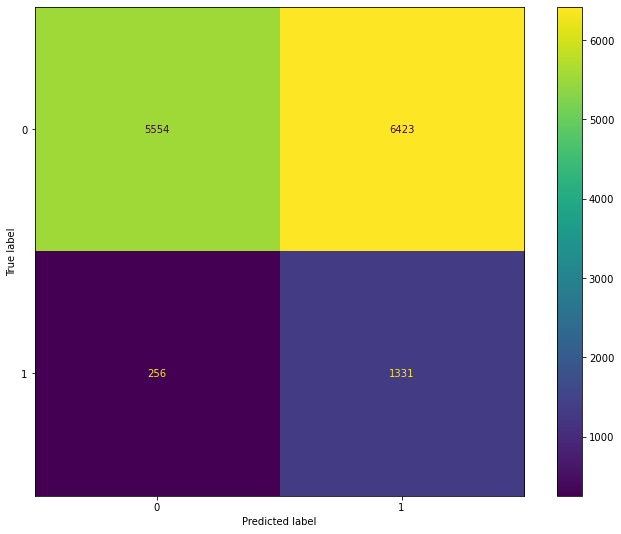

In [86]:
parameters = {'eta': [0.1,0.3,0.05],
             'colsample_bytree': [0.5,0.75,1],
             'max_depth': [2,3,4],
             'scale_pos_weight': [11],
             'eta': [0.05, 0.1],
             'gamma':[0,2,3]
             }

results_df0_xgb = xgboost_grid_search(df0, 'df0_xgb_1',parameters);
xgb_result_df_gs = xgb_result_df_gs.append(results_df0_xgb , ignore_index = True)

### df0_dummy hyperameters gridsearch 2

Fitting 30 folds for each of 18 candidates, totalling 540 fits


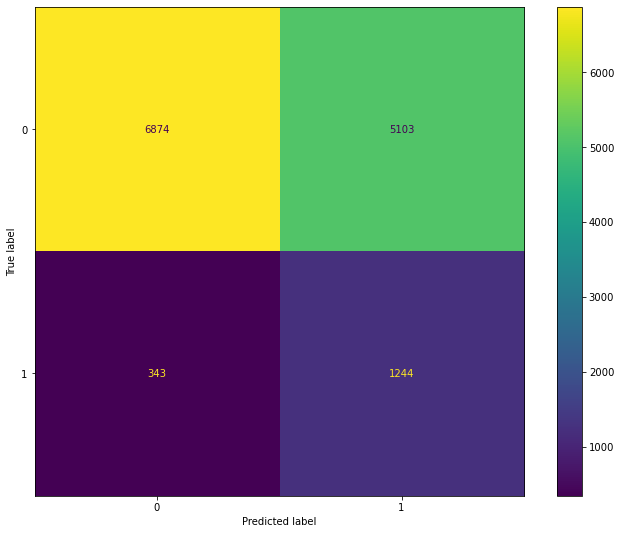

In [87]:
parameters = {'eta': [0.1,0.3,0.05],
             #'min_child_weight ': [100, 300, 600],
             'colsample_bytree': [0.5,0.75,1],
             'max_depth': [2,3,4],
             'scale_pos_weight': [11],
             'eta': [0.1, 0.3],
             #'gamma':[0,2,5]
             }

results_df0_xgb = xgboost_grid_search(df0, 'df0_xgb_2',parameters);
xgb_result_df_gs = xgb_result_df_gs.append(results_df0_xgb , ignore_index = True)

### Visualize Results Table

In [88]:
pd.set_option('display.max_colwidth', -1)
xgb_result_df_gs

name  train_recall  test_recall  precision   roc_auc    pr_auc   FN  \
0  df0_xgb_1  0.835494      0.838689     0.171653   0.651206  0.397953  256   
1  df0_xgb_2  0.791194      0.783869     0.195998   0.678901  0.407330  343   

     FP  \
0  6423   
1  5103   

                                                                            Hyperparameters  
0  {'colsample_bytree': 1, 'eta': 0.05, 'gamma': 3, 'max_depth': 2, 'scale_pos_weight': 11}  
1  {'colsample_bytree': 0.5, 'eta': 0.1, 'max_depth': 2, 'scale_pos_weight': 11}

The model that had the best performance was XGBoost with the parameters {'colsample_bytree': 0.5, 'eta': 0.1, 'max_depth': 2, 'scale_pos_weight': 11}.

This model is chosen after hyperparameters tuning because its **recall** value is acceptable and the amount of **FN** and **FP** values are optimal compared to previous trials.

### Confussion Matrix

The Confussion Matrix that refers to our problem be explained in the following way:

- there're clients which are going to be contact because the model has predicted that they would accept and in reality they do not acquiere the service (False Positive [FP], False Positives).
- there're clients which are going to be contact because the model has predicted that they would not accept but in reality they would acquiere the service (False Negative [FN], False Negatives).
- there're clients which are going to be contact because the model has predicted that they would accept and in fact they do acquiere the service(True Positive [TP], True Positives).
- there're clients which are going to be contact because the model has predicted that they would not accept the offer and in reality they do not accept it (True Negative [TN], True Negatives).

# Benchmarking

Benchmarking is used to measure performance using a specific indicator resulting in a metric that is then compared to others. This allows organizations to develop plans on making improvements or adapting specific best practices, usually to increase some aspect of performance.

In our case, the column 'duration' indicates the last contact duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call the target "y" is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

The columns 'duration' is added to the dataframe chosen to train and predict and the model used is the XGBoost model with the best hyperparameters obtained.

In [89]:
bank_df_duration = pd.read_csv("bank_marketing_data.csv")
df0['duration']= bank_df_duration['duration']
df0_duration = df0

In [90]:
def xgboost_grid_search(dataframe,attempt_name,parameters):
    
    dataframe_dummy = pd.get_dummies(dataframe, drop_first=True)
    #Spliting entry from target
    X = dataframe_dummy.drop('outcome', axis=1) #Target is drop from the data
    y = dataframe_dummy.outcome #Target
    #30% for test & 70% for train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)
    xgb_multiple = XGBClassifier(objective = "binary:logistic",use_label_encoder=False, seed = 12,verbosity = 0)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    clf=GridSearchCV(estimator = xgb_multiple, param_grid = parameters, scoring='recall', cv = cv, verbose = True)
    #Model Training
    best_clf = clf.fit(X_train,y_train)
    # predict probabilities
    rf_probs = best_clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    rf_probs = rf_probs[:, 1]
    # calculate precision and recall for each threshold
    rf_precision, rf_recall, _ = skm.precision_recall_curve(y_test, rf_probs)
    # predict class values
    y_train_prf = best_clf.predict(X_train) #Test prediction
    y_test_prf = best_clf.predict(X_test) #Test prediction
    #METRICS 
    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)
    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)
    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)
    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)
    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)
    # PR AUC in Test
    rf_auc = skm.auc(rf_recall, rf_precision)
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    results={"name": attempt_name,
            "train_recall": train_recall, 
             "test_recall":test_recall, 
             "precision": test_precision,
             "roc_auc": roc_auc,
              "pr_auc": rf_auc,
              "FN": fn,
              "FP": fp,
              "Hyperparameters":best_clf.best_params_}

    # Confussion Matrix
    skm.plot_confusion_matrix(best_clf, X_test, y_test)
    
    # An empty df is created to store the metrics of each alternative
    column_names = ["name","train_recall", "test_recall", "precision","roc_auc","pr_auc", "FN","FP","Hyperparameters"]
    xgb_result_df_gs = pd.DataFrame(columns = column_names) 
  
    return results

Fitting 30 folds for each of 1 candidates, totalling 30 fits


name  train_recall  test_recall  precision   roc_auc    pr_auc  \
0  df0_xgb_1     0.835494      0.838689     0.171653   0.651206  0.397953   
1  df0_xgb_2     0.791194      0.783869     0.195998   0.678901  0.407330   
2  df0_duration  0.904646      0.897921     0.340991   0.833990  0.551135   

    FN    FP  \
0  256  6423   
1  343  5103   
2  162  2754   

                                                                            Hyperparameters  
0  {'colsample_bytree': 1, 'eta': 0.05, 'gamma': 3, 'max_depth': 2, 'scale_pos_weight': 11}  
1  {'colsample_bytree': 0.5, 'eta': 0.1, 'max_depth': 2, 'scale_pos_weight': 11}             
2  {'colsample_bytree': 0.5, 'eta': 0.1, 'max_depth': 2, 'scale_pos_weight': 11}

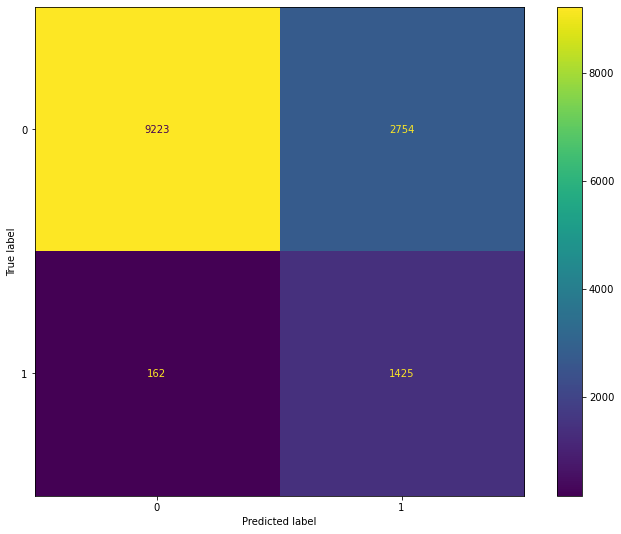

In [91]:
# Parameters
parameters = {'colsample_bytree': [0.5], 'eta': [0.1], 'max_depth': [2], 'scale_pos_weight': [11]}

# Function evaluation
results_df0_duration = xgboost_grid_search(df0_duration, 'df0_duration',parameters);
xgb_result_df_gs = xgb_result_df_gs.append(results_df0_duration , ignore_index = True)

# Showing the results
pd.set_option('display.max_colwidth', -1)
xgb_result_df_gs

The observed results adding the 'duration' column to the dataframe are better in terms of obtaining not higher recall values but also a significantly reduced number of FP and FN. 

# Model Application

## 1. Prediction cases: Family

We create a new dataframe column and concatenate it with the dataframe that will be used to train the 
data because we need to create the dummies using the whole dataset. 

After that the data to be 
predicted is separated and used only for prediction after the model is trained

| person | age | salary | marital | education |  default | balance | housing | loan | contact | month | poutcome | outcome| 
|-|-|-|-|-|-|-|-|-|-|-|-|-|
| grandma  | 85 | 20000  | married | secondary | no | 60000 | no | no |  unknown | mar | failure | 0 |  
| father   | 63 | 80000  | married | tertiary | no | 20000 | no | yes |  telephone | mar | failure | 0 |  
| mother   | 57 | 210000 | married | tertiary | no | 10000 | no | no |  unknown | dec | success | 0 |  
| daughter | 30 | 40000  | married | tertiary | yes | 1500 | yes | yes |  cellular | jul | unknown | 0 |  
| daughter | 28 | 35000  | married | secondary | yes | 8000 | yes | no |  unknown | aug | failure | 0 |  
| son      | 37 | 60000  | married | secondary | yes | 5000 | no | yes |  cellular | jan | failure | 0 |  
| son      | 25 |  4000 | single | secondary | no | 500 | no | yes |  cellular | dec | failure | 0 |  


In [ ]:
# adding a Familly as a use case that we will predict if they will "subscribe or not"


data_to_be_predicted = pd.DataFrame({'age_group':[8,6,5,3,2,3,2],
                          'salary':[20000,80000,210000,40000,35000,60000,4000],
                          'marital-education':['married-secondary','married-tertiary','married-tertiary','single-tertiary','divorced-secondary','married-secondary','single-secondary'],
                          'default':['no','no','no','yes','yes','yes','no'],
                          'balance':[60000,20000,10000,1500,800,5000,500],
                          'housing':['no','no','no','yes','yes','no','no'],
                          'loan':['no','yes','no','yes','no','yes', 'yes'], 
                          'contact':['unknown','telephone','unknown','cellular','unknown','cellular','cellular'], 
                          'month':['mar','mar','dec','jul','aug','jan','dec'], 
                          'poutcome':['failure','failure','success','unknown','failure','failure','failure'],
                          'outcome':[0,0,0,0,0,0,0]})      # The outcome columns is not important
data_to_be_predicted

# concat the dataframes
frames = [df0,data_to_be_predicted]
new_data = pd.concat(frames)
# dummies
new_data_dummies = pd.get_dummies(new_data)

number_of_people = data_to_be_predicted.shape[0]
#Spliting entry from target
#Saving the rows that we be used just for prediction and deleting the outcome column from it
Xnew_with_outcome = new_data_dummies.tail(number_of_people)
Xnew = Xnew_with_outcome.drop('outcome', axis =1, errors='ignore')

X = new_data_dummies.drop('outcome', axis=1) #Target is dropped from the data
X.drop(index=X.index[-number_of_people:],axis=0,inplace=True) # Rows for prediction are dropped from the training data
y = new_data_dummies.outcome 
y.drop(index=y.index[-number_of_people:],axis=0,inplace=True)

### XGBoost

In [ ]:
#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)

# Model
xgb_multiple = XGBClassifier(objective = "binary:logistic",use_label_encoder=False, seed = 12,verbosity = 0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
clf=GridSearchCV(estimator = xgb_multiple, 
                 param_grid = {'colsample_bytree': [0.5], 'eta': [0.1], 'max_depth': [2], 'scale_pos_weight': [11]}, 
                 scoring='recall', cv = cv, 
                 verbose = True)

#Model Training
best_clf = clf.fit(X_train,y_train)

Fitting 50 folds for each of 1 candidates, totalling 50 fits


XGBoost prediction
Person 1
Predicted=[0.18271899 0.817281  ], Outcome=1 
Person 2
Predicted=[0.13402545 0.86597455], Outcome=1 
Person 3
Predicted=[0.12537307 0.87462693], Outcome=1 
Person 4
Predicted=[0.5140083 0.4859917], Outcome=0 
Person 5
Predicted=[0.5059892 0.4940108], Outcome=0 
Person 6
Predicted=[0.49284524 0.50715476], Outcome=1 
Person 7
Predicted=[0.19456834 0.80543166], Outcome=1 


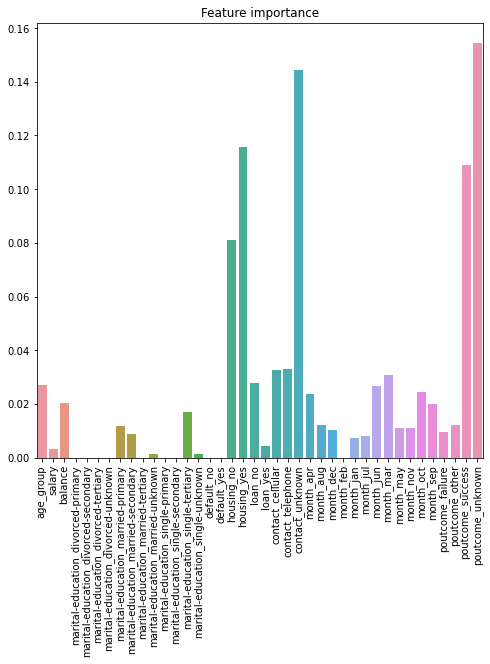

In [ ]:
y_predicted = best_clf.predict(Xnew)
y_pedicted_proba = best_clf.predict_proba(Xnew)
# print(y_pedicted_proba)
# print( "Predicted=%s" % ( y_predicted[0]))
print('XGBoost prediction')
for i in range(len(Xnew)):
    print(f'Person {i+1}')
    print("Predicted=%s, Outcome=%s " % (y_pedicted_proba[i], y_predicted[i])) 

#Variables importance
plt.figure(figsize=(8,8))
importances = best_clf.best_estimator_.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

## 2. Prediction cases: Company Staff

We create a new dataframe column and concatenate it with the dataframe that will be used to train the 
data because we need to create the dummies using the whole dataset. 

After that the data to be 
predicted is separated and used only for prediction after the model is trained

| person           | age | salary | marital  | education |  default | balance | housing | loan | contact | month | poutcome | outcome| 
|-|-|-|-|-|-|-|-|-|-|-|-|-|
| CEO              | 50 | 500000  | divorced | tertiary  | no       | 200000  | no       | no   |  unknown   | dec | success | 0 |  
| CFO              | 45 | 300000  | single  | tertiary  | no       | 150000  | no       | no   |  unknown   | dec | success | 0 |  
| Director         | 47 | 200000  | divorced | tertiary  | no       | 100000  | no       | yes  |  telephone | dec | failure | 0 |  
| Manager          | 40 | 150000  | married  | tertiary  | no       | 20000   | no       | yes  |  unknown   | dec | failure | 0 |  
| Engineer 1       | 35 | 80000   | married  | tertiary  | no       | 10000   | yes      | yes  |  cellular  | dec | unknown | 0 |  
| Administrative 1 | 25 | 40000   | married  | secondary | yes      | 1000    | yes      | no   |  unknown   | dec | unknown | 0 |  
| Administrative 2 | 27 | 40000   | divorced | secondary | yes      | 1300    | yes      | no   |  unknown   | dec | unknown | 0 |  
| Accountant       | 36 | 80000   | married  | tertiary  | yes      | 7000    | no       | yes  |  cellular  | dec | unknown | 0 |  
| Lawyer           | 30 | 80000   | single   | tertiary  | no       | 3000    | no       | no   |  telephone | dec | failure | 0 |  

In [ ]:
# adding a Company as a use case that we will predict if they will "subscribe or not"


data_to_be_predicted = pd.DataFrame({'age_group':[5,4,4,4,3,2,2,3,3],
                          'salary':[500000,300000,200000,150000,80000,40000,40000,80000,80000],
                          'marital-education':['divorced-tertiary','single-tertiary','divorced-tertiary','married-tertiary','married-tertiary','married-secondary','divorced-secondary','married-tertiary','single-tertiary'],
                          'default':['no','no','no','no','no','yes','yes','yes','no'],
                          'balance':[200000,150000,100000,20000,10000,1000,1300,7000,3000],
                          'housing':['no','no','no','no','yes','yes','yes','no','no'],
                          'loan':['no','no','yes','yes','yes','no','no','yes', 'no'], 
                          'contact':['unknown','unknown','telephone','unknown','cellular','unknown','unknown','cellular','telephone'], 
                          'month':['dec','dec','dec','dec','dec','dec','dec','dec','dec'], 
                          'poutcome':['success','success','failure','failure','unknown','unknown','unknown','unknown','failure'],
                          'outcome':[0,0,0,0,0,0,0,0,0]})      # The outcome column is not important because it will be dropped
data_to_be_predicted

# concat the dataframes
frames = [df0,data_to_be_predicted]
new_data = pd.concat(frames)
# dummies
new_data_dummies = pd.get_dummies(new_data)

number_of_people = data_to_be_predicted.shape[0]
#Spliting entry from target
#Saving the rows that we be used just for prediction and deleting the outcome column from it
Xnew_with_outcome = new_data_dummies.tail(number_of_people)
Xnew = Xnew_with_outcome.drop('outcome', axis =1, errors='ignore')

X = new_data_dummies.drop('outcome', axis=1) #Target is dropped from the data
X.drop(index=X.index[-number_of_people:],axis=0,inplace=True) # Rows for prediction are dropped from the training data
y = new_data_dummies.outcome 
y.drop(index=y.index[-number_of_people:],axis=0,inplace=True)

### XGBoost

In [ ]:
#30% for test & 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)

# Model
xgb_multiple = XGBClassifier(objective = "binary:logistic",use_label_encoder=False, seed = 12,verbosity = 0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
clf=GridSearchCV(estimator = xgb_multiple, 
                 param_grid = {'colsample_bytree': [0.5], 'eta': [0.1], 'max_depth': [2], 'scale_pos_weight': [11]}, 
                 scoring='recall', cv = cv, 
                 verbose = True)

#Model Training
best_clf = clf.fit(X_train,y_train)

Fitting 50 folds for each of 1 candidates, totalling 50 fits


XGBoost prediction
Person 1
Predicted=[0.11878419 0.8812158 ], Outcome=1 
Person 2
Predicted=[0.10237849 0.8976215 ], Outcome=1 
Person 3
Predicted=[0.30669975 0.69330025], Outcome=1 
Person 4
Predicted=[0.47348636 0.52651364], Outcome=1 
Person 5
Predicted=[0.3832863 0.6167137], Outcome=1 
Person 6
Predicted=[0.4213255 0.5786745], Outcome=1 
Person 7
Predicted=[0.40160644 0.59839356], Outcome=1 
Person 8
Predicted=[0.29269618 0.7073038 ], Outcome=1 
Person 9
Predicted=[0.19405556 0.80594444], Outcome=1 


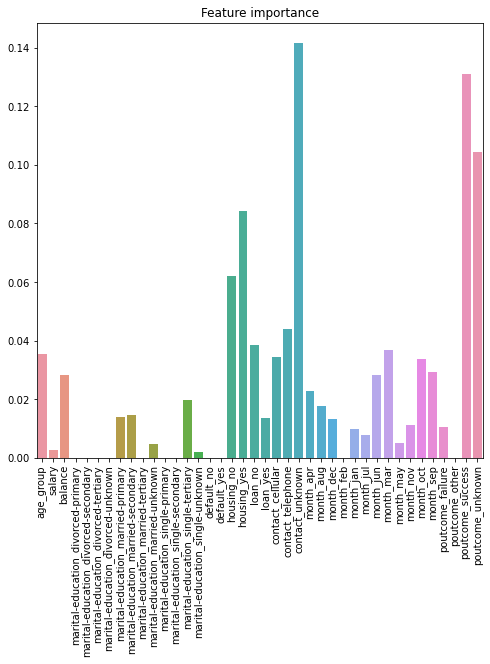

In [ ]:
y_predicted = best_clf.predict(Xnew)
y_pedicted_proba = best_clf.predict_proba(Xnew)

print('XGBoost prediction')
for i in range(len(Xnew)):
    print(f'Person {i+1}')
    print("Predicted=%s, Outcome=%s " % (y_pedicted_proba[i], y_predicted[i])) 

#Variables importance
plt.figure(figsize=(8,8))
importances = best_clf.best_estimator_.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

# Observations summary

Obsevations have been pointed along the notebook and are summarized in this section.

- The target class has uneven distribution of observations with distributions of 12% and 88%.
  
- After the variable analysis and preprocessing, in order to choose the final dataset to train the models many considerations were taken into account.
    - Columns are highly correlated with each other, so only one of them must remain
        - age, age_group, eligible
        - job, salary
        - marital, education, marital-education, tag
        - pdays, pcampaign, poutcome
    - The variable 'day' it has a high cardinality and low correlation with target.
    - The columns 'duration' and 'campaign' contained information that was not used to train models and predict, since it's the information of the contact we haven't made yet. This column was used for benchmarking.
- Undersampling and Oversampling techniques were implemented, nevertheless, better results were obtained without applying them.
- It was found that XGBoost gave better results than Random Forest. If you carefully tune parameters, gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting. XGBoost also tend to be harder to tune than random forests, that is why a meticulous analysis and study of hyperparameters using gridsearchcv was performed prior to the definition of the final hyperparameters.
- The metrics chosen to evaluate our model were Recall, FN and FP. One of the main goals is to minimize the amount of resulting FP and FN.
- One thing should be adressed is that approach taken to solve this problem is entirely based on the behaviour of clients and not on their motivations. The features reveal the actions of the clients but not their opinions or thought processes. In a real problem, more descriptive features would be useful for analysis, for example and interview summary. In that case natural language processing (NLP) could help us to obtain even better results.
- From the business point of view, for the bank, saving a time  and resources by not focusing on clients with less probability to accept the product the bank is offering is yet another advantages of this project. preserving the relationship with the best customers is more crucial than ever. Using these results bank can specifically target clients and gain higher success in their endeavours. 
- The model was used in two "use cases" scenarios, as an example of how we can effectively use our model for predicting the outome in a real case scenario.